## Plotting Decision Regions

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Import classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split

In [2]:
# Read the data
df = pd.read_csv('data/wbc.csv')
df.drop('Unnamed: 32', axis=1, inplace=True)

# Change the labels to 1 and 0's
label_dict = {'M':1, "B":0}
df['diagnosis'] = df.diagnosis.map(label_dict)

In [3]:
# Create features and target
X = df[['radius_mean', 'concave points_mean']]
y = df.diagnosis

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

X.shape, y.shape

((569, 2), (569,))

In [4]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)
    
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('K Nearest Neighbours',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_s...
                             ('Classification Tree',
                              DecisionTr

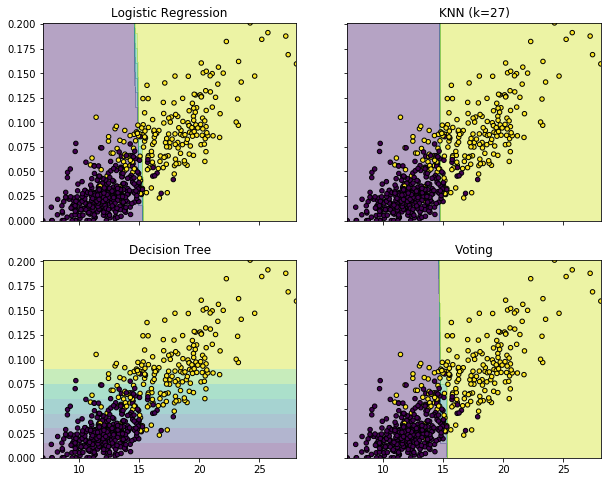

In [5]:
## Source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
## Modified: Yes (slightly)

from itertools import product

# Plotting decision regions
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [lr, knn, dt, vc],
                        ['Logistic Regression', 'KNN (k=27)',
                         'Decision Tree', 'Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
    axarr[idx].set_ylim(X.values[:,1].min(), X.values[:,1].max())
    axarr[idx].set_xlim(X.values[:,0].min(), X.values[:,0].max())

plt.show()